In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/Norman/Desktop/Code_Repo/Python_Projects/data/breast_cancer_wisconsin.csv")
# The following displays the top 5 rows and all columns.
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The only attribute inputs of interest are the means.  The reason being is that it does not make sense to look at the standard error or the worst case value of the measurement.

In [3]:
attribute_mean = list(data.columns[1:11])

Class labels need to be turned into integers because sklearn library uses
numbers to represent classes. M = 0 and B = 1

In [4]:
data['diagnosis'] = data['diagnosis'].map({'M':0, 'B':1})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


I create a bar graph with y axis being the frequency of the observed value to
look at the distribution of the class.  It is important to see how skewed it is.  A little skewness is not a problem.

The plot shows that there is more benign data points than there are 
malignant.  However, it does not look like it is terrible, so it might be
possible to ignore the slight skewness in the class labels.  In other words,
the skewness might not have a huge impact on the accuracy measure.  

Text(0, 0.5, 'Class')

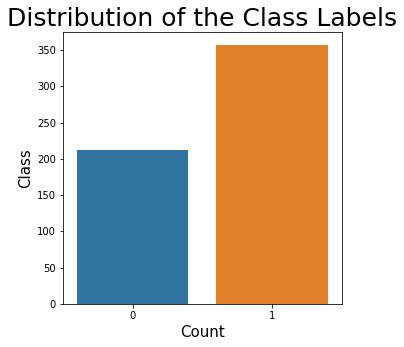

In [5]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['diagnosis'], label='Count')
plt.title("Distribution of the Class Labels", size=25)
plt.xlabel("Count", size=15)
plt.ylabel("Class", size=15)

# 1. Parameter Optimization using sci-kit learn GridSearchCV method

The GridSearchCV method is used to select the best parameters for a classification model.  In this section, I demonstrate an example of implementing the method by wrapping it within a function.  

param_grid is a dictionary used to specify values for each parameter of interest.  The parameter is specific to each classification technique.  If a parameter is not included in param_grid, then the default values will be used when testing.  

In [6]:
# Making a wrapper function for GridSearchCV method.
def Classification_model_gridsearchCV(model, param_grid, data_X, data_y):
    # https://scikit-learn.org/stable/modules/generated/
    # sklearn.model_selection.GridSearchCV.html
    clf = GridSearchCV(model, param_grid, cv=10, scoring="accuracy")
    clf.fit(data_X,data_y)
    print("The best parameters are:")
    print(clf.best_params_)
    print("the best estimator is ")
    print(clf.best_estimator_)
    print("The accuracy score is ")
    print(clf.best_score_)

In [7]:
input_params = ['concave points_mean', 'perimeter_mean', 'radius_mean',
                'area_mean', 'concavity_mean']
train_x = data[input_params]
train_y = data.loc[:,'diagnosis']

In [8]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }

In [9]:
model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid, train_x, train_y)


The best parameters are:
{'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8}
the best estimator is 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
The accuracy score is 
0.9244288224956063


In [10]:
model = KNeighborsClassifier()
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 
              'weights': weight_options}
Classification_model_gridsearchCV(model, param_grid, train_x, train_y)

The best parameters are:
{'leaf_size': 1, 'n_neighbors': 16, 'weights': 'uniform'}
the best estimator is 
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')
The accuracy score is 
0.8945518453427065


In [11]:
model=svm.SVC()
# We passed 2 dictionaries.  The GridSearchCV method returns the best dict to 
# use out of the 2.  
param_grid = [{'C':[1, 10, 100, 1000], 'kernel':['linear']},
              {'C':[1, 10, 100, 1000], 'gamma':[0.001, 0.0001], 
               'kernel': ['rbf']}]
Classification_model_gridsearchCV(model, param_grid, train_x, train_y)

The best parameters are:
{'C': 10, 'kernel': 'linear'}
the best estimator is 
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
The accuracy score is 
0.9050966608084359
